In [1]:
import pandas as pd
import numpy as np


eeg_data = pd.read_csv("../data/sample_output/saved_new_data.csv")

eeg_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,0,609.75,594.50,593.00,563.25,555.50,547.00,518.50,519.5,508.75,...,140.25,108.50,105.50,113.50,112.75,69.00,89.75,51.75,-8178.75,-8179.50
1,1,-230.75,-167.75,-170.50,-221.75,-203.50,-202.50,-174.00,-181.5,-175.25,...,-688.00,-650.25,-640.50,-683.75,-675.50,-836.50,-669.75,-867.25,-8175.75,-8176.50
2,2,-941.75,-840.50,-829.50,-876.00,-845.50,-845.75,-771.25,-780.0,-769.50,...,-1216.75,-1142.50,-1133.25,-1198.50,-1195.25,-1407.75,-1165.50,-1440.50,-8172.75,-8173.25
3,3,-1284.25,-1189.50,-1183.75,-1209.25,-1166.75,-1163.25,-1083.50,-1058.5,-1075.25,...,-1400.25,-1305.50,-1291.00,-1360.50,-1359.25,-1579.50,-1309.25,-1600.25,8191.75,-2930.25
4,4,-1145.50,-1077.25,-1066.75,-1066.25,-1029.75,-1027.50,-958.75,-944.0,-954.25,...,-896.25,-836.75,-821.25,-862.50,-861.75,-967.00,-821.50,-974.00,8191.75,8191.75


In [2]:
# filtering EEG Signals with different types of filters
from scipy.signal import butter, lfilter, filtfilt, iirnotch


In [3]:
fs = 256 # Sampling rate in Hz
lowcut = 0.5 # High-pass filter cutoff frequency
highcut = 40 # Low-pass filter cutoff frequency
notch_freq = 50 # Notch Frequency
notch_quality = 30.0 # Quality factor for notch filter

In [4]:
# Design a Butterworth filter which serves as a bandpass filter
def butter_filter(data, lowcut, highcut, fs, order=5, btype="band"):
    nyquist = 0.5 * fs
    low = lowcut/nyquist
    high = highcut/nyquist
    b, a = butter(order, [low,high], btype=btype)
    y = filtfilt(b, a, data)
    return y

In [5]:
def apply_notch_filter(data, freq, fs, quality):
    w0 = freq / (0.5 * fs)
    b, a = iirnotch(w0, quality)
    y = filtfilt(b, a, data)
    return y


In [6]:
# dropping off Unnamed column
eeg_data = eeg_data.drop(columns="Unnamed: 0")

In [8]:
eeg_data.values

array([[  609.75,   594.5 ,   593.  , ...,    51.75, -8178.75, -8179.5 ],
       [ -230.75,  -167.75,  -170.5 , ...,  -867.25, -8175.75, -8176.5 ],
       [ -941.75,  -840.5 ,  -829.5 , ..., -1440.5 , -8172.75, -8173.25],
       ...,
       [ -695.25,  -705.25,  -691.25, ...,  -597.  ,  8191.75,  8191.75],
       [   54.5 ,   -31.5 ,   -30.  , ...,   454.25,  8191.75,  8190.75],
       [  821.  ,   684.75,   675.  , ...,  1214.75,  8191.75,  8188.25]])

In [9]:
filtered_data = butter_filter(eeg_data.values, lowcut, highcut, fs, order=5, btype="band")

In [13]:
filtered_data = apply_notch_filter(filtered_data, notch_freq, fs, notch_quality)

In [15]:
filtered_data.shape

(5005, 64)

In [18]:
import matplotlib.pyplot as plt

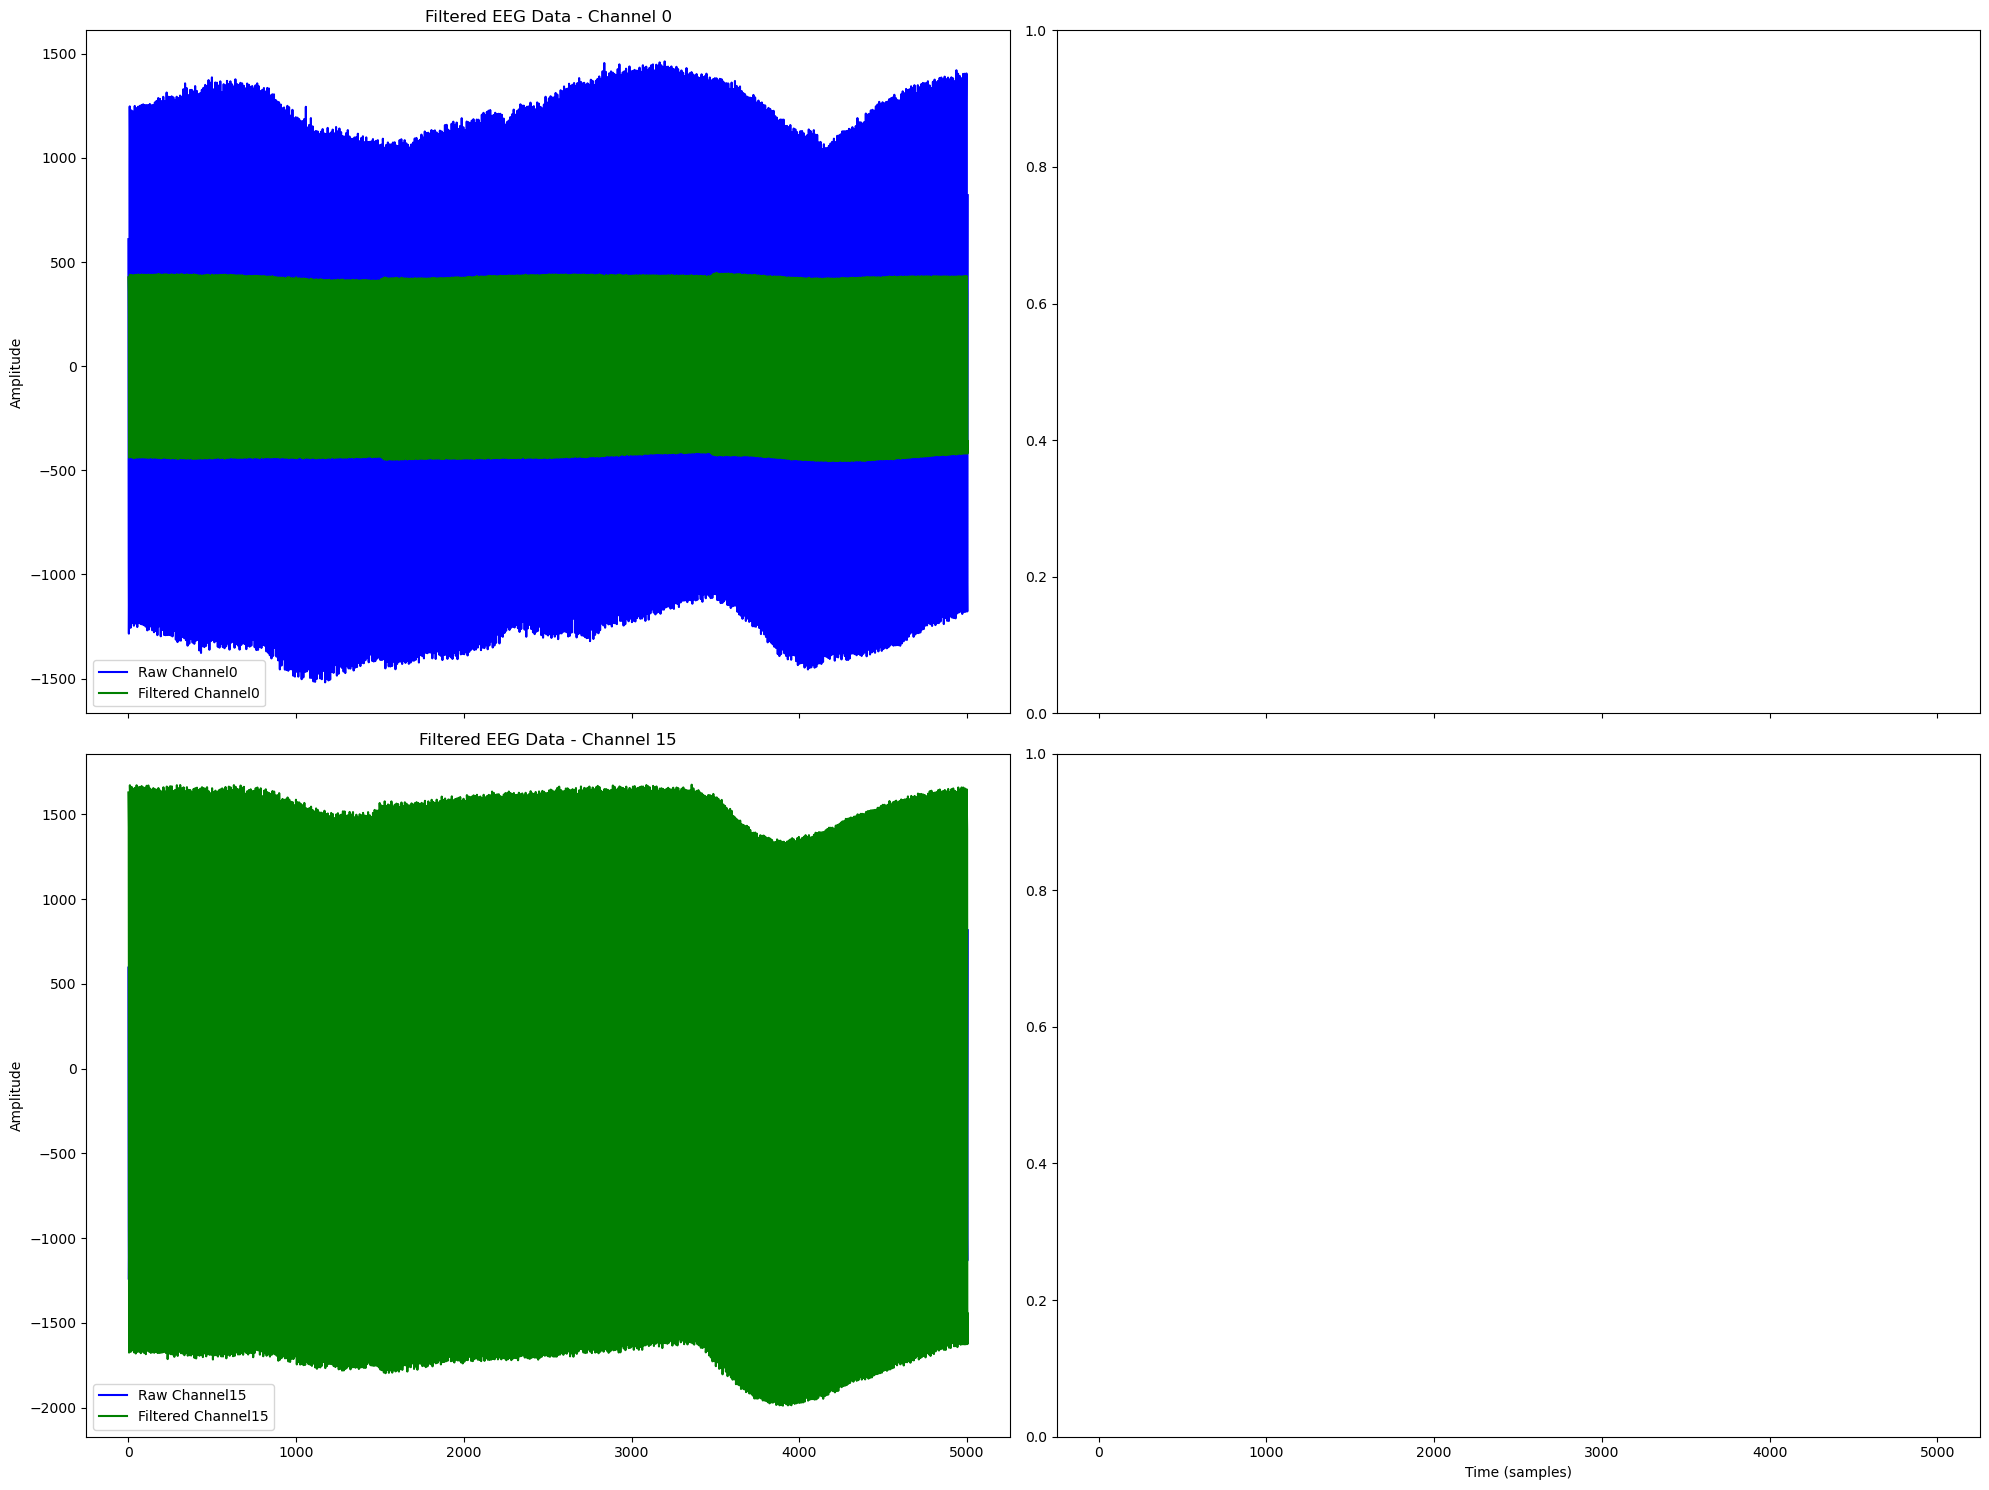

In [24]:
channel_indices = [0,15]
time = range(filtered_data.shape[0])

fig, axs = plt.subplots(2,2, figsize=(20,15), sharex=True)

for i, idx in enumerate(channel_indices):
    axs[i, 0].plot(time, eeg_data[str(idx)], label=f"Raw Channel{idx}", color="blue")
    axs[i, 0].set_title(f"Raw EEG Data - Channel {idx}")
    axs[i, 0].set_ylabel("Amplitude")
    axs[i, 0].legend()

    axs[i, 0].plot(time, filtered_data[:, idx], label=f"Filtered Channel{idx}", color="green")
    axs[i, 0].set_title(f"Filtered EEG Data - Channel {idx}")
    axs[i, 0].set_ylabel("Amplitude")
    axs[i, 0].legend()

plt.xlabel("Time (samples)")
plt.tight_layout()
plt.show()

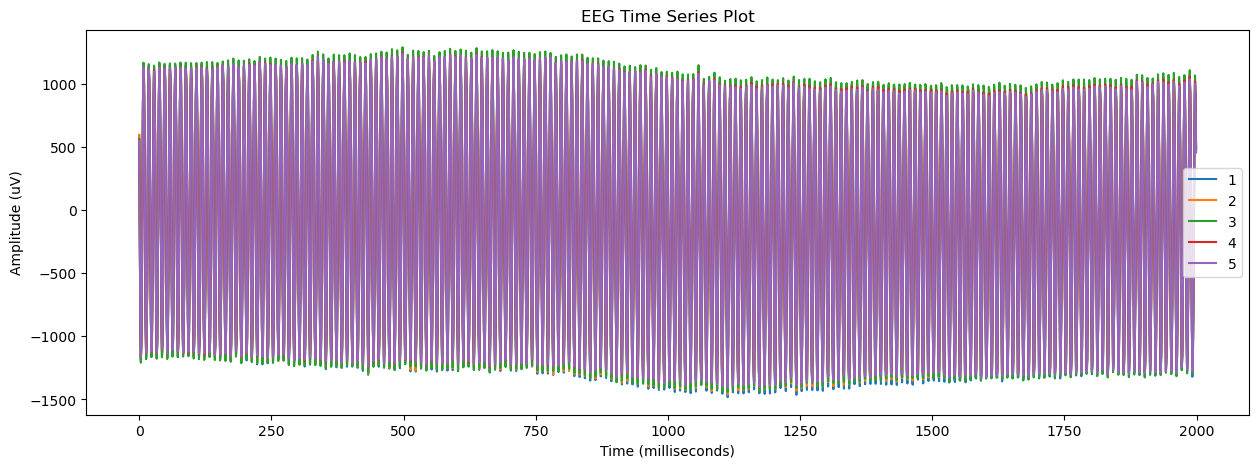

In [25]:
import matplotlib.pyplot as plt

# Assuming each column is a channel and the first column is time or index
channels = eeg_data.columns[1:]  # Adjust if your format includes a time/index column
sampling_rate = 1000  # Example: 1000 Hz, adjust as per your setup

# Plot the first few seconds of EEG data for the first few channels
plt.figure(figsize=(15, 5))
for channel in channels[:5]:  # Adjust the slice for more/less channels
    plt.plot(eeg_data[channel][:sampling_rate * 2], label=channel)  # Plotting first 2 seconds

plt.title('EEG Time Series Plot')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude (uV)')
plt.legend()
plt.show()
